# Preprocessing

This notebook contains code to read in data from the Muse and break it into labelled chunks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.io

In [2]:
%matplotlib inline

## Importing data

In [3]:
# def loadData(filename='...')
filename = 'data/subj1-run1b.mat'
# alldata = pd.read_csv("...")

In [4]:
data = scipy.io.loadmat(filename)
data.keys()

['mytraindata', '__version__', '__header__', '__globals__']

In [5]:
braindata = data['mytraindata']

In [6]:
s = braindata[0,0]

In [7]:
s.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('stamps', 'O')])

In [8]:
labels = [x[0] for x in s['chanlocs']['labels'][0]]
print labels

[u'TP9', u'FP1', u'FP2', u'TP10', u'n/a', u'n/a']


In [9]:
df = pd.DataFrame(np.transpose(s['data']), columns=labels,)
df.drop('n/a', axis=1, inplace=True)

df['time'] = df.index * 1.0/s['srate'][0,0]

In [10]:
df.head()

,TP9,FP1,FP2,TP10,time
0,868.549622,857.034729,935.993835,682.666870,0.000000
1,868.549622,751.756042,857.034729,893.224304,0.004545
2,921.188965,804.395386,857.034729,998.503052,0.009091
3,921.188965,804.395386,883.354431,893.224304,0.013636
4,921.188965,804.395386,857.034729,945.863708,0.018182


In [11]:
print s['filepath']
print s['pnts']
print s['srate']
# print s['event']

[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[478880]]
[[220]]


In [34]:
srate = s['srate'][0,0]

In [12]:
chunks = pd.DataFrame()

last_time = 0
last_type = 0
print 'type \tdeltatime \ttime'
for i, (typ, time, _) in enumerate(s['event'][0]):
    typ = int(typ[0])
    time = time[0,0]/s['srate'][0,0]
    
    # Fix errors during the recording process
    if i==9:
        typ = 12
    
    if i >= 20:
        mapping = {149:151, 151:149}
        if typ in mapping:
            typ = mapping[typ]
    
    # Display stuff
    print i, typ,'\t', time-last_time, '\t', time
    
    # Extract sessions
    if typ == 12:
        cases = {149:'fast', 151:'slow'}
        chunks = chunks.append({'case':cases[last_type],'start_time':last_time,'end_time':time}, ignore_index=True)
        print "Chunk extracted"
    
    last_time = time
    last_type = typ
    
chunks['duration'] = chunks.end_time - chunks.start_time
chunks['data'] = [df[(start < df.time) & (df.time <= end)] 
                  for start, end in zip(chunks.start_time, chunks.end_time)]
chunks['length'] = [len(data) for data in chunks.data]
chunks

type 	deltatime 	time
0 100 	11 	11
1 100 	0.118184694377 	11.1181846944
2 149 	96.2332033186 	107.351388013
3 12 	88.0189482407 	195.370336254
Chunk extracted
4 151 	57.4247037147 	252.795039968
5 12 	92.4315845442 	345.226624513
Chunk extracted
6 149 	60.4002277316 	405.626852244
7 12 	89.4562879447 	495.083140189
Chunk extracted
8 151 	62.17706736 	557.260207549
9 12 	87.8711118063 	645.131319355
Chunk extracted
10 149 	60.5032967101 	705.634616065
11 12 	89.5613764977 	795.195992563
Chunk extracted
12 151 	60.0053969401 	855.201389503
13 12 	89.7576747042 	944.959064207
Chunk extracted
14 149 	61.0692645657 	1006.02832877
15 12 	89.2522025051 	1095.28053128
Chunk extracted
16 151 	59.8456611071 	1155.12619239
17 12 	84.1515301589 	1239.27772254
Chunk extracted
18 149 	66.8299283265 	1306.10765087
19 12 	82.2995678659 	1388.40721874
Chunk extracted
20 151 	66.8352170746 	1455.24243581
21 12 	77.8238407331 	1533.06627654
Chunk extracted
22 149 	72.6299971897 	1605.69627373
23 12 	89.

,case,end_time,start_time,duration,data,length
0,fast,195.370336,107.351388,88.018948,TP9 FP1 FP2 ...,19364
1,slow,345.226625,252.795040,92.431585,TP9 FP1 FP2 ...,20335
2,fast,495.083140,405.626852,89.456288,TP9 FP1 FP2 ...,19681
3,slow,645.131319,557.260208,87.871112,TP9 FP1 FP2 ...,19331
4,fast,795.195993,705.634616,89.561376,TP9 FP1 FP2 ...,19704
5,slow,944.959064,855.201390,89.757675,TP9 FP1 FP2 ...,19746
6,fast,1095.280531,1006.028329,89.252203,TP9 FP1 FP2 ...,19635
7,slow,1239.277723,1155.126192,84.151530,TP9 FP1 FP2 ...,18514
8,fast,1388.407219,1306.107651,82.299568,TP9 FP1 FP2 ...,18106
9,slow,1533.066277,1455.242436,77.823841,TP9 FP1 FP2 ...,17121


In [13]:
len(chunks)

14

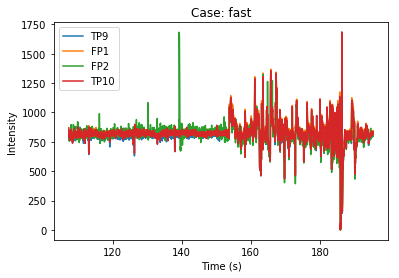

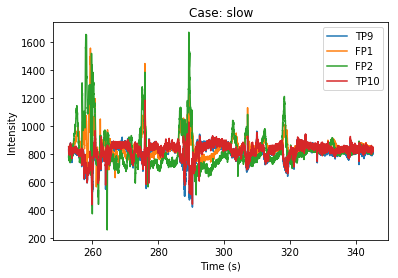

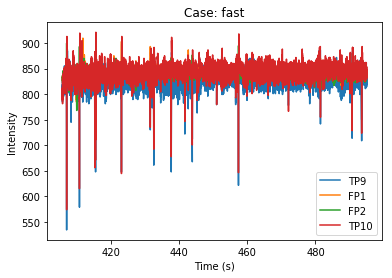

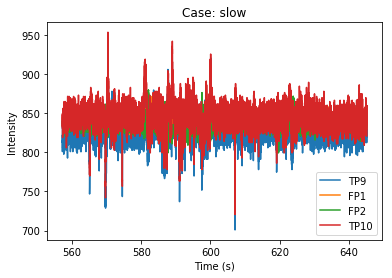

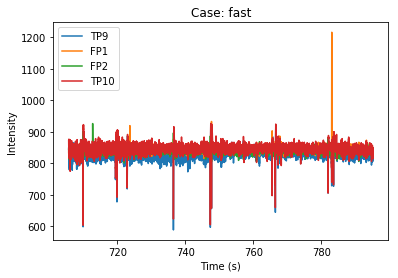

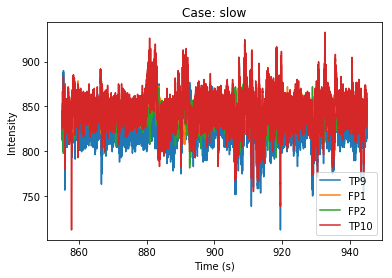

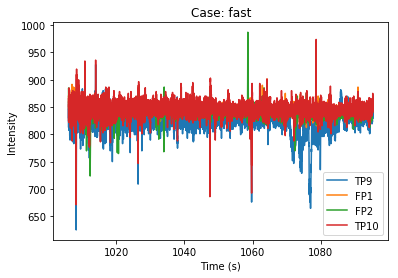

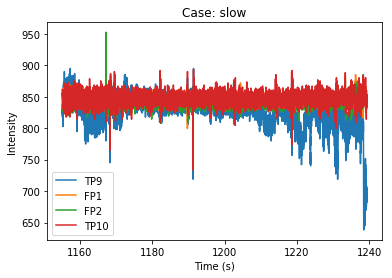

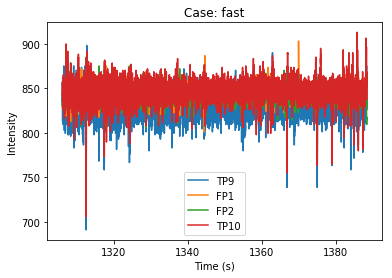

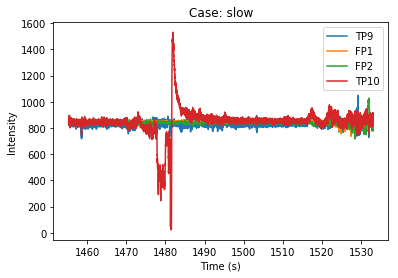

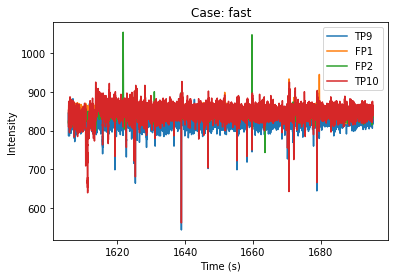

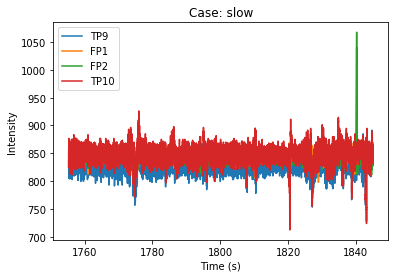

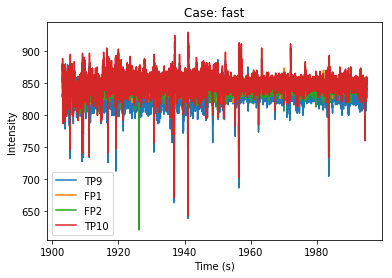

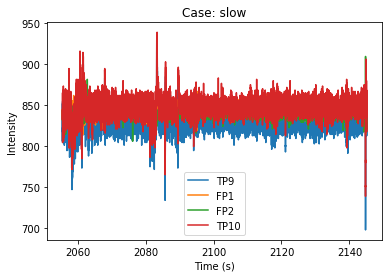

In [31]:
def plotChunk(chunk):
    channels='TP9 FP1 FP2 TP10'.split()
    data = chunk.data
    plt.title("Case: {}".format(chunk.case))
    plt.plot(data.time, data[channels])
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity')
    plt.legend(channels)
    
for chunk in chunks.itertuples():
    plotChunk(chunk)
    plt.show()
    
# plotChunk(next(chunks.itertuples()))

# Make smaller "uchunks" from 5-sec periods of the data

In [33]:
uchunk_len = 5.0

uchunks = pd.DataFrame(columns=chunks.columns)
for chunk in chunks.itertuples():
    start = chunk.start_time
    while True:
        end = start + uchunk_len
        if end > chunk.end_time:
            break
        
        uchunks = uchunks.append({'case':chunk.case,'start_time':start,'end_time':end}, ignore_index=True)
        start = end


uchunks['duration'] = uchunks.end_time - uchunks.start_time
uchunks['data'] = [df[(start < df.time) & (df.time <= end)] 
                  for start, end in zip(uchunks.start_time, uchunks.end_time)]
uchunks['length'] = [len(data) for data in uchunks.data]    
    
print len(uchunks)
uchunks.head()

236


,case,end_time,start_time,duration,data,length
0,fast,112.351388,107.351388,5.0,TP9 FP1 FP2 ...,1100
1,fast,117.351388,112.351388,5.0,TP9 FP1 FP2 ...,1100
2,fast,122.351388,117.351388,5.0,TP9 FP1 FP2 ...,1100
3,fast,127.351388,122.351388,5.0,TP9 FP1 FP2 ...,1100
4,fast,132.351388,127.351388,5.0,TP9 FP1 FP2 ...,1100


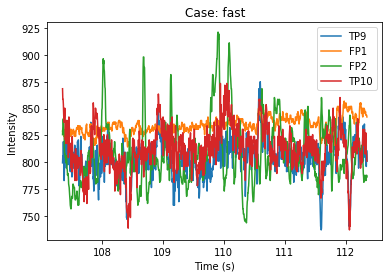

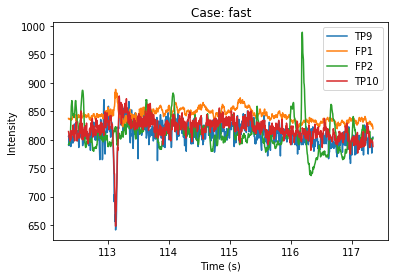

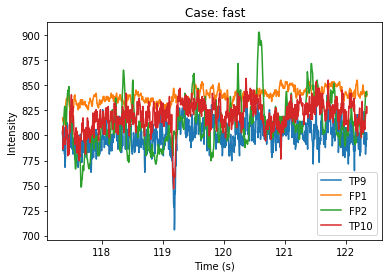

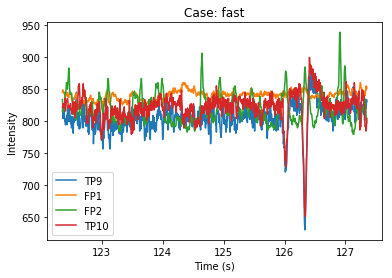

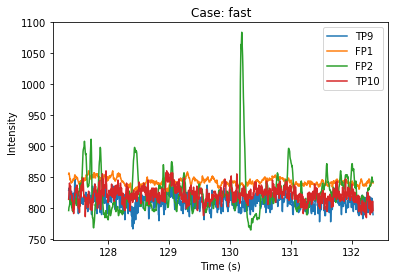

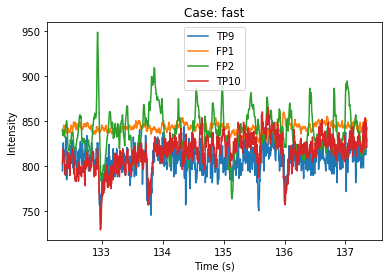

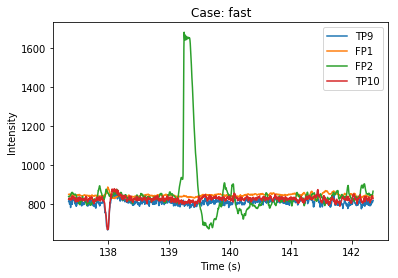

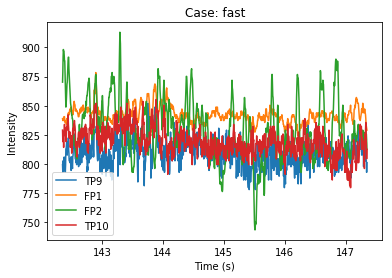

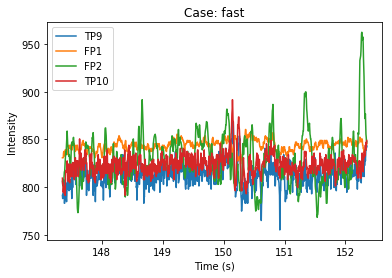

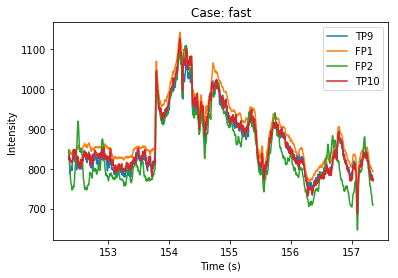

In [29]:
for i, chunk in zip(range(10), uchunks.itertuples()):
    plotChunk(chunk)
    plt.show()